In [12]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from mlxtend.classifier import StackingCVClassifier
from itertools import cycle
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
import lightgbm as lgb
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [13]:
zip_file_path = 'Dutch_data_processed_onehot.zip'
csv_file_inside_zip = 'Dutch_data_processed_onehot.csv'

In [14]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [15]:
warnings.filterwarnings("ignore")

In [16]:
df

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Year,Month,Weekday,...,Departure_area_Genderland,Departure_area_North Brabant,Departure_area_North Holland,Departure_area_Other,Departure_area_South Holland,Departure_area_Utrecht,Household_composition_Couple,Household_composition_Couple and kids,Household_composition_One person household,Household_composition_Other
0,1,1,42,1,1,0,0,2018,1,6,...,0,0,0,1,0,0,0,0,1,0
1,1,1,42,1,1,0,0,2018,1,6,...,0,0,0,1,0,0,0,0,1,0
2,1,1,42,1,1,0,0,2018,1,6,...,0,0,0,1,0,0,0,0,1,0
3,1,1,42,1,1,0,0,2018,1,6,...,0,0,0,1,0,0,0,0,1,0
4,2,1,42,1,1,0,0,2018,1,5,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692050,3,0,49,1,1,0,0,2022,12,4,...,0,0,1,0,0,0,0,0,0,1
692051,3,0,49,1,1,0,0,2022,12,4,...,0,0,1,0,0,0,0,0,0,1
692052,3,0,49,1,1,0,0,2022,12,4,...,0,0,1,0,0,0,0,0,0,1
692053,3,0,49,1,1,0,0,2022,12,4,...,0,0,1,0,0,0,0,0,0,1


In [96]:
drops = ["Mode"]
X = df.drop(drops, axis=1)

<Axes: >

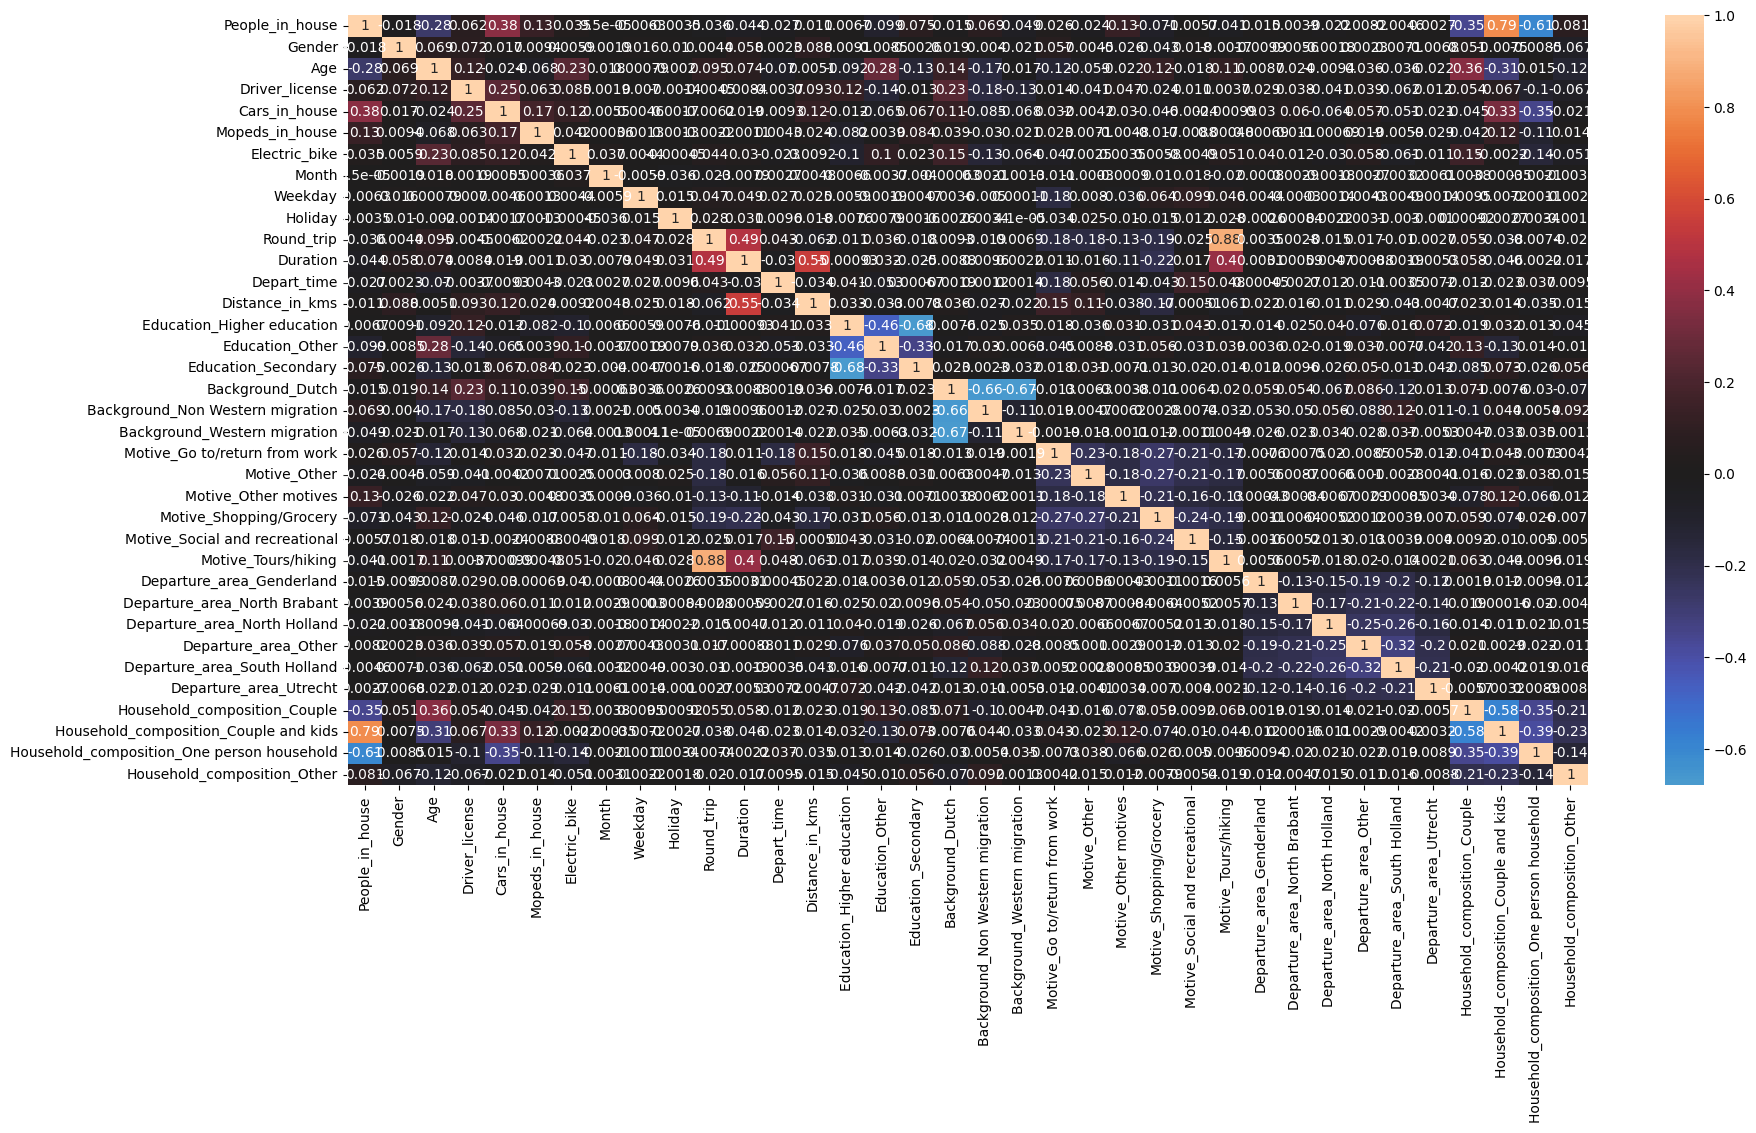

In [43]:
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

In [57]:
pd.set_option('display.float_format', '{:.4f}'.format)

In [58]:
X1 = sm.add_constant(df)
vif_data = pd.DataFrame()
vif_data["Variable"] = X1.columns
vif_data["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
print(vif_data)

                                      Variable    VIF
0                                        const 0.0000
1                              People_in_house 4.3575
2                                       Gender 1.0263
3                                          Age 1.4444
4                               Driver_license 1.2162
5                                Cars_in_house 1.3565
6                              Mopeds_in_house 1.0532
7                                Electric_bike 1.1407
8                                         Year 1.0448
9                                        Month 1.0058
10                                     Weekday 1.0495
11                                     Holiday 1.0047
12                                  Round_trip 5.7513
13                                Arrival_area 2.2404
14                                    Duration 2.4126
15                                        Mode 1.4505
16                                 Depart_time 1.0714
17                          

We will remove Arrival_area, due to high correlation with Departure_area

# 4 labels: Car, Bike, Walk, Public Trasport

In [60]:
drops = ["Mode", "Arrival_area", "Year", "Round_trip"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [61]:
X

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,...,Departure_area_Genderland,Departure_area_North Brabant,Departure_area_North Holland,Departure_area_Other,Departure_area_South Holland,Departure_area_Utrecht,Household_composition_Couple,Household_composition_Couple and kids,Household_composition_One person household,Household_composition_Other
0,1,1,42,1,1,0,0,1,6,0,...,0,0,0,1,0,0,0,0,1,0
1,1,1,42,1,1,0,0,1,6,0,...,0,0,0,1,0,0,0,0,1,0
2,1,1,42,1,1,0,0,1,6,0,...,0,0,0,1,0,0,0,0,1,0
3,1,1,42,1,1,0,0,1,6,0,...,0,0,0,1,0,0,0,0,1,0
4,2,1,42,1,1,0,0,1,5,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692050,3,0,49,1,1,0,0,12,4,0,...,0,0,1,0,0,0,0,0,0,1
692051,3,0,49,1,1,0,0,12,4,0,...,0,0,1,0,0,0,0,0,0,1
692052,3,0,49,1,1,0,0,12,4,0,...,0,0,1,0,0,0,0,0,0,1
692053,3,0,49,1,1,0,0,12,4,0,...,0,0,1,0,0,0,0,0,0,1


In [62]:
X, y = shuffle(X, y, random_state=42)

In [63]:
X

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,...,Departure_area_Genderland,Departure_area_North Brabant,Departure_area_North Holland,Departure_area_Other,Departure_area_South Holland,Departure_area_Utrecht,Household_composition_Couple,Household_composition_Couple and kids,Household_composition_One person household,Household_composition_Other
450271,2,0,59,1,1,0,1,5,3,0,...,0,0,0,0,1,0,1,0,0,0
28807,2,1,82,1,1,0,0,4,2,0,...,0,0,1,0,0,0,1,0,0,0
74133,3,1,55,1,3,1,0,6,4,0,...,0,0,1,0,0,0,0,1,0,0
343899,2,0,62,1,1,0,0,8,1,0,...,0,0,1,0,0,0,1,0,0,0
655809,5,1,51,1,2,0,0,5,6,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2,1,53,1,2,0,1,12,1,0,...,1,0,0,0,0,0,1,0,0,0
365838,2,1,42,1,0,0,0,9,4,0,...,0,0,1,0,0,0,1,0,0,0
131932,2,0,64,1,0,0,0,12,2,0,...,0,0,1,0,0,0,1,0,0,0
671155,4,1,40,1,1,0,0,12,1,0,...,0,0,0,1,0,0,0,1,0,0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42, stratify=y)

In [65]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    253675
1    141458
2    138822
3     19689
Name: count, dtype: int64

Class counts in y_test:
Mode
0    63419
1    35365
2    34705
3     4922
Name: count, dtype: int64


In [67]:
perc=y_train.value_counts(True)*100
print(perc)

Mode
0   45.8192
1   25.5504
2   25.0742
3    3.5563
Name: proportion, dtype: float64


In [68]:
undersampler = RandomUnderSampler(sampling_strategy={0: 19689}, random_state=1)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [69]:
undersampler = RandomUnderSampler(sampling_strategy={1: 19689}, random_state=1)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [70]:
undersampler = RandomUnderSampler(sampling_strategy={2: 19689}, random_state=1)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [71]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

Class counts in y_train:
Mode
0    19689
1    19689
2    19689
3    19689
Name: count, dtype: int64


In [72]:
X_train.shape

(78756, 35)

# Logistic Regression

In [73]:
log_reg=LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'solver': ['lbfgs', 'liblinear'],
              'max_iter': [100, 200, 300]}
grid_search_log = GridSearchCV(log_reg, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_log.fit(X_train, y_train)
log_params = grid_search_log.best_params_
print(log_params)

{'C': 100, 'max_iter': 200, 'solver': 'lbfgs'}


In [76]:
logreg_model=LogisticRegression(C=100, max_iter=200, solver='lbfgs')
logreg_model.fit(X_train, y_train)
y_pred_log = logreg_model.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           0       0.91      0.66      0.77     63419
           1       0.56      0.53      0.54     35365
           2       0.74      0.88      0.80     34705
           3       0.19      0.65      0.29      4922

    accuracy                           0.68    138411
   macro avg       0.60      0.68      0.60    138411
weighted avg       0.75      0.68      0.70    138411



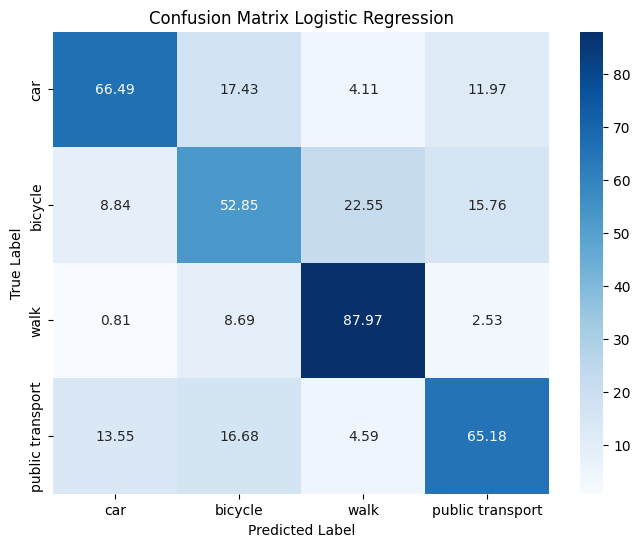

In [77]:
class_labels = ["car", "bicycle", "walk", "public transport"]
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_log) / conf_matrix_log.sum(axis=1)
conf_matrix_percentages_log = (conf_matrix_log.T / conf_matrix_log.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_log, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [78]:
class_labels_mapping = {
    0: 'car',
    1: 'bike',
    2: 'walk',
    3: 'public transport'
}

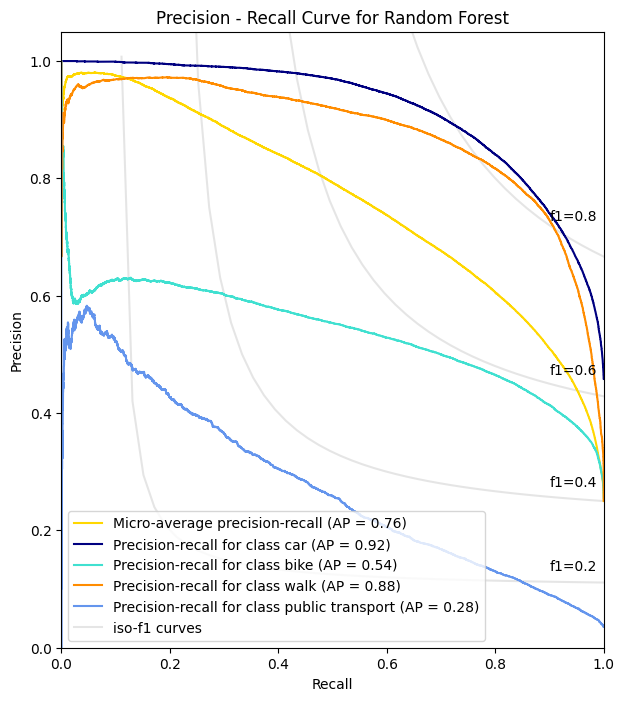

In [79]:
class_probabilities_log = logreg_model.predict_proba(X_test)
y_pred_prob_log = np.argmax(class_probabilities_log, axis=1)
y_test_bin_log = label_binarize(y_test, classes=logreg_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(logreg_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_log[:, i], class_probabilities_log[:, i])
    average_precision[i] = average_precision_score(y_test_bin_log[:, i], class_probabilities_log[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_log.ravel(), class_probabilities_log.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_log, class_probabilities_log, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Random Forest")

plt.show()

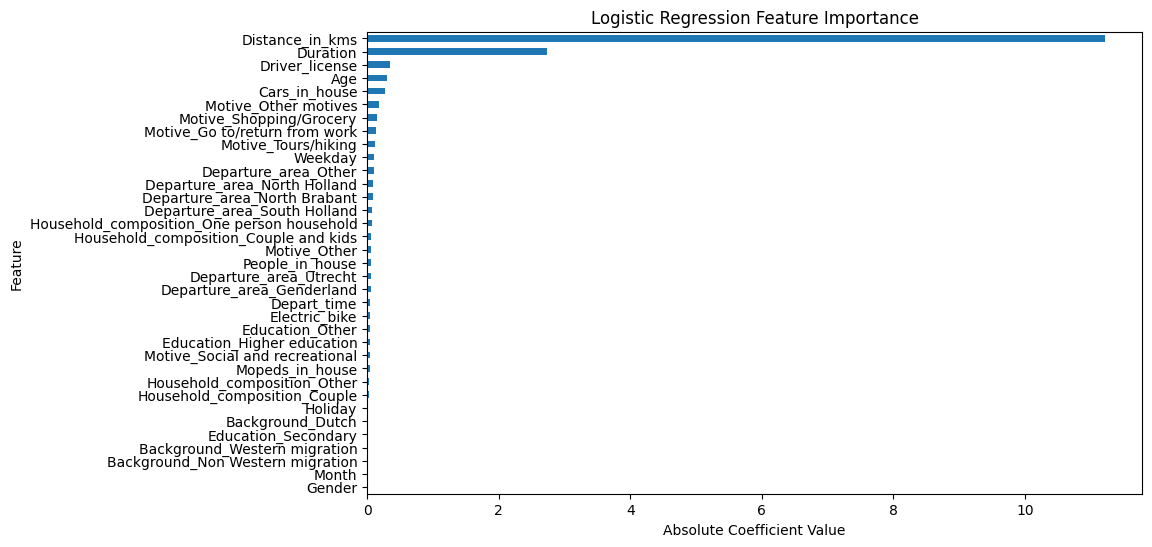

In [80]:
coefficients = pd.Series(logreg_model.coef_[0], index=X.columns)

sorted_coefficients = coefficients.abs().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sorted_coefficients.plot(kind='barh')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Decision Tree

In [81]:
 tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)
y_pred_test = tree.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.85      0.66      0.74     63419
           1       0.53      0.53      0.53     35365
           2       0.77      0.77      0.77     34705
           3       0.16      0.67      0.26      4922

    accuracy                           0.65    138411
   macro avg       0.58      0.65      0.58    138411
weighted avg       0.73      0.65      0.68    138411



In [82]:
max_depth = tree.tree_.max_depth
max_depth

37

In [83]:
dt_model = DecisionTreeClassifier(random_state=42)

In [84]:
param_grid = {
    'max_depth': list(range(2, 38))
}

grid_search_dt = GridSearchCV(dt_model, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30, 31, ...]},
             scoring='f1_macro')

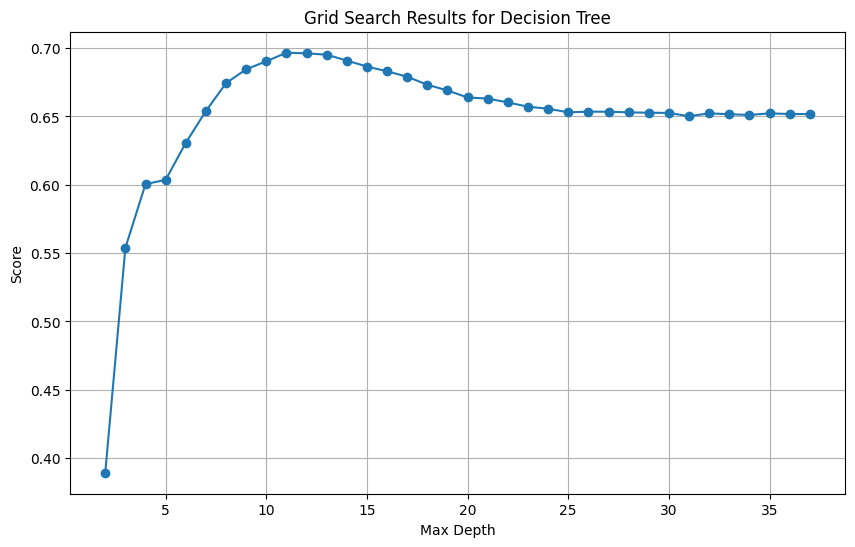

In [85]:
results = grid_search_dt.cv_results_
max_depth_values = results['param_max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [89]:
 tree = DecisionTreeClassifier(random_state = 42, max_depth=12)
tree.fit(X_train, y_train)
y_pred_test = tree.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.92      0.67      0.77     63419
           1       0.54      0.65      0.59     35365
           2       0.82      0.81      0.82     34705
           3       0.20      0.66      0.31      4922

    accuracy                           0.70    138411
   macro avg       0.62      0.70      0.62    138411
weighted avg       0.77      0.70      0.72    138411



In [90]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Duration', 'Depart_time', 'Distance_in_kms',
       'Education_Higher education', 'Education_Other', 'Education_Secondary',
       'Background_Dutch', 'Background_Non Western migration',
       'Background_Western migration', 'Motive_Go to/return from work',
       'Motive_Other', 'Motive_Other motives', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Tours/hiking',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_Other',
       'Departure_area_South Holland', 'Departure_area_Utrecht',
       'Household_composition_Couple', 'Household_composition_Couple and kids',
       'Household_composition_One person household',
       'Household_composition_Other'],
      dtype='object')

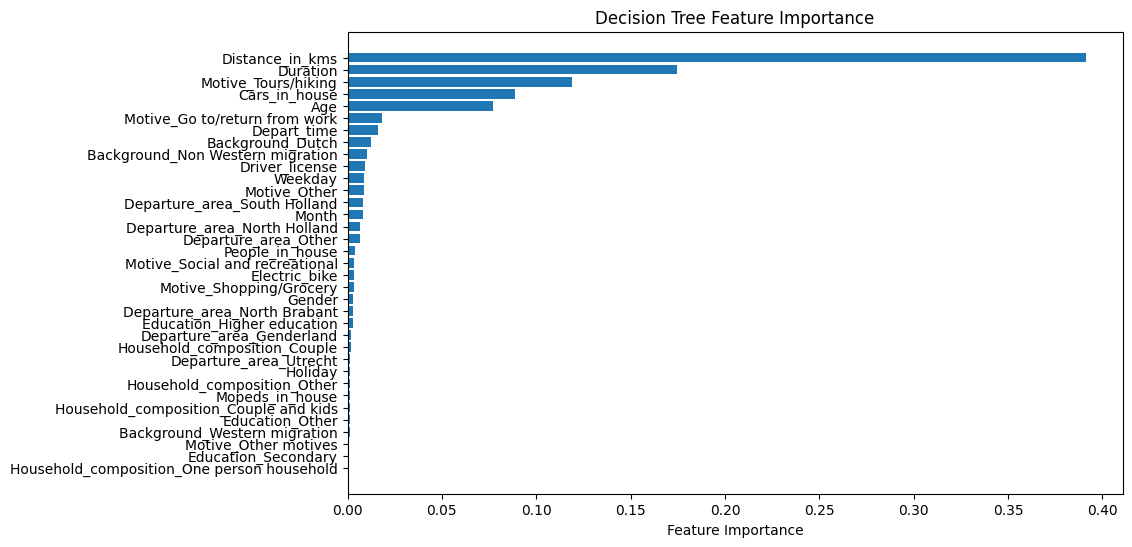

In [92]:
feature_importances = tree.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Duration', 'Depart_time', 'Distance_in_kms',
       'Education_Higher education', 'Education_Other', 'Education_Secondary',
       'Background_Dutch', 'Background_Non Western migration',
       'Background_Western migration', 'Motive_Go to/return from work',
       'Motive_Other', 'Motive_Other motives', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Tours/hiking',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_Other',
       'Departure_area_South Holland', 'Departure_area_Utrecht',
       'Household_composition_Couple', 'Household_composition_Couple and kids',
       'Household_composition_One person household',
       'Household_composition_Other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

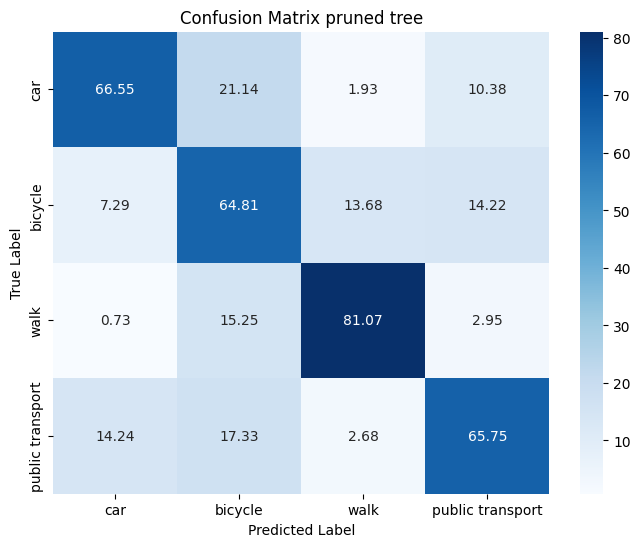

In [93]:
class_labels = ["car", "bicycle", "walk", "public transport"]
conf_matrix_dt = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_dt) / conf_matrix_dt.sum(axis=1)
conf_matrix_percentages_dt = (conf_matrix_dt.T / conf_matrix_dt.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_dt, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix pruned tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [94]:
class_labels_mapping = {
    0: 'car',
    1: 'bike',
    2: 'walk',
    3: 'public transport'
}

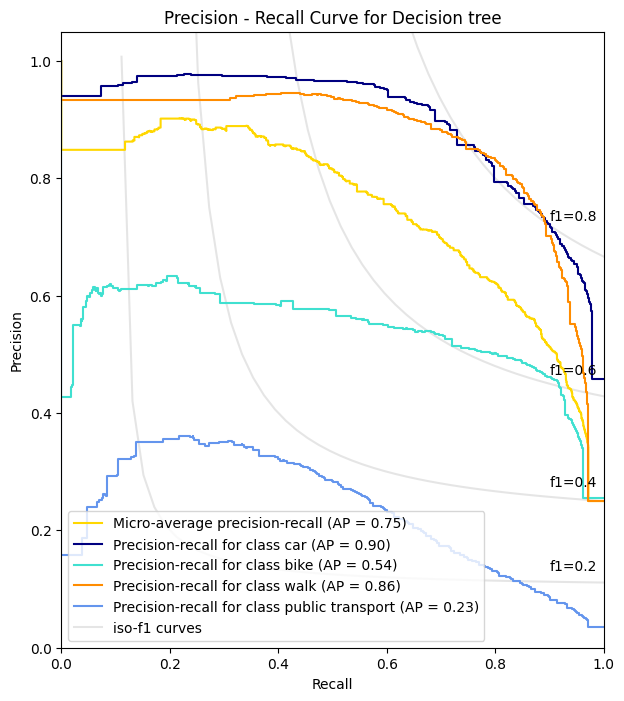

In [95]:
class_probabilities_tree = tree.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)
y_test_bin_tree = label_binarize(y_test, classes=tree.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(tree.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    average_precision[i] = average_precision_score(y_test_bin_tree[:, i], class_probabilities_tree[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_tree.ravel(), class_probabilities_tree.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_tree, class_probabilities_tree, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Decision tree")

plt.show()

# Random Forest

In [96]:
X.shape

(692055, 35)

In [97]:
param_grid = {
    'max_features': range(2, 35)
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 10}


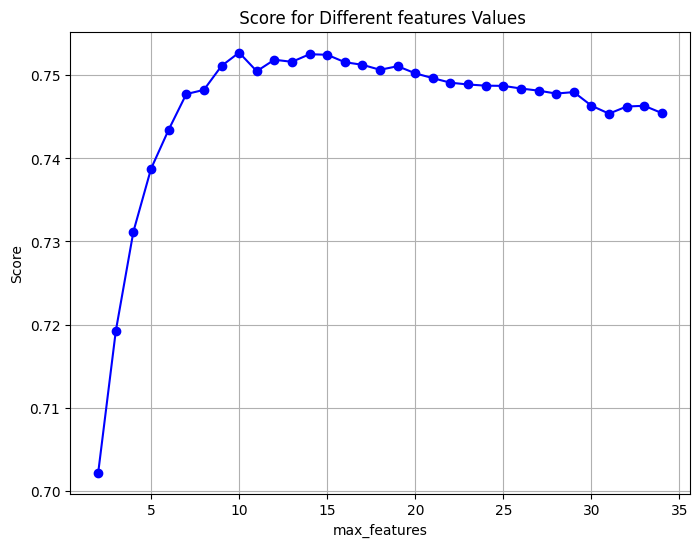

In [98]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['max_features']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for Different features Values')
plt.xlabel('max_features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [104]:
param_grid = {
    'n_estimators' : [250, 350, 450, 550]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'n_estimators': 550}


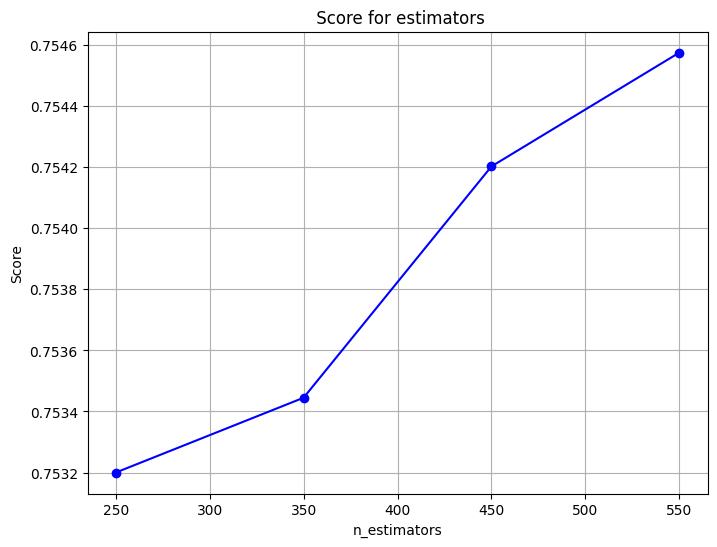

In [105]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['n_estimators']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for estimators')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [108]:
param_grid = {
    'n_estimators' : [500, 550, 600],
    'max_features' : [5, 7, 8]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 5, 'n_estimators': 600}


In [99]:
random_forest = RandomForestClassifier(random_state=42, max_features=10, n_estimators=400)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_features=10, n_estimators=400, random_state=42)

In [100]:
y_pred_rf_basic = random_forest.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       0.93      0.73      0.81     63419
           1       0.61      0.65      0.63     35365
           2       0.82      0.86      0.84     34705
           3       0.26      0.79      0.39      4922

    accuracy                           0.74    138411
   macro avg       0.66      0.76      0.67    138411
weighted avg       0.80      0.74      0.76    138411



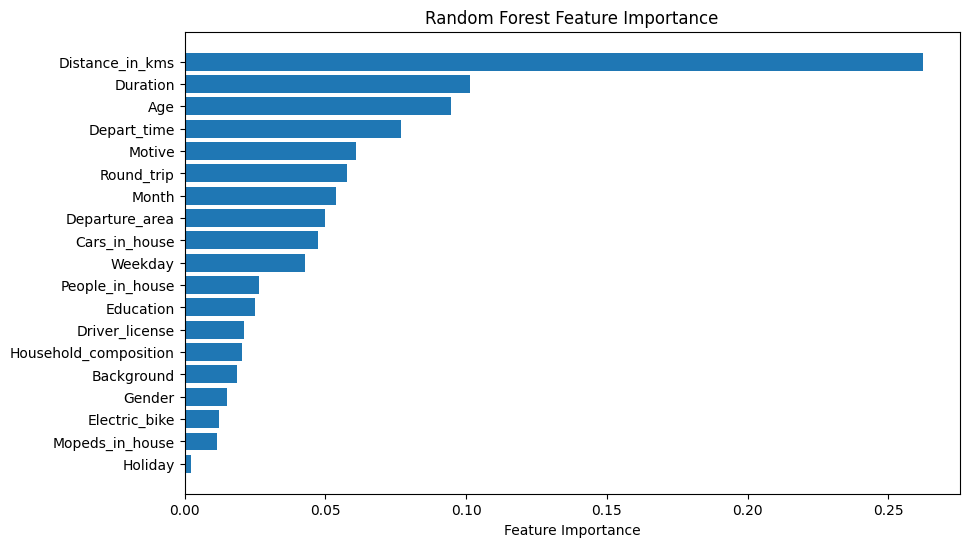

In [112]:
feature_importances = random_forest.feature_importances_

feature_names = ['People_in_house', 'Household_composition', 'Gender', 'Age',
       'Background', 'Education', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday','Holiday',
       'Round_trip', 'Motive', 'Departure_area', 'Duration', 'Depart_time',
       'Distance_in_kms']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

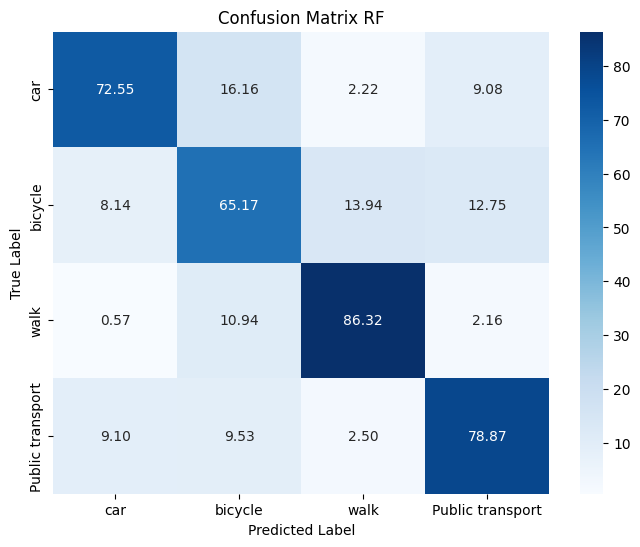

In [101]:
class_labels = ["car", "bicycle", "walk", "Public transport"]
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_basic)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_rf) / conf_matrix_rf.sum(axis=1)
conf_matrix_percentages_rf = (conf_matrix_rf.T / conf_matrix_rf.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_rf, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix RF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

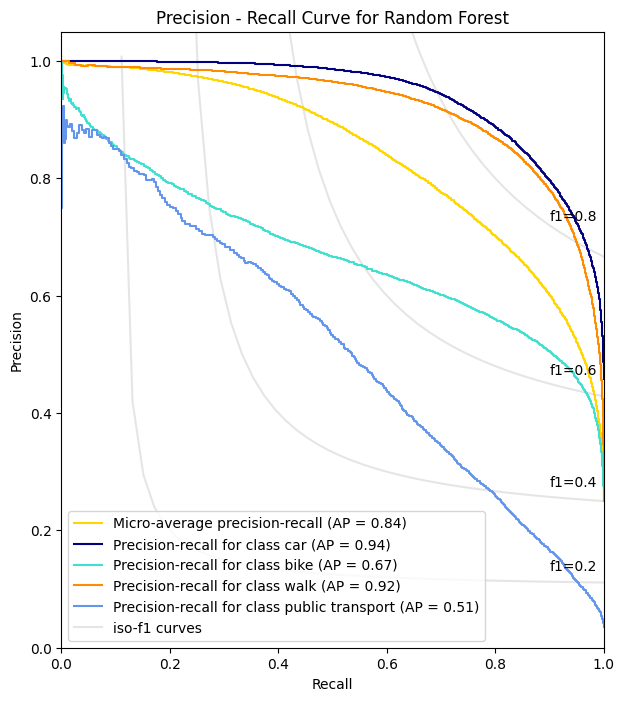

In [102]:
class_probabilities_rf = random_forest.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)
y_test_bin_rf = label_binarize(y_test, classes=random_forest.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(random_forest.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    average_precision[i] = average_precision_score(y_test_bin_rf[:, i], class_probabilities_rf[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_rf.ravel(), class_probabilities_rf.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_rf, class_probabilities_rf, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Random Forest")

plt.show()

# XGBoost

In [116]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)

In [117]:
param_grid = {
    'n_estimators' : [500, 550, 600, 650],
}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
print(best_params_xgb)

{'n_estimators': 600}


In [118]:
param_grid = {
    'learning_rate' : [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
print(best_params_xgb)

{'learning_rate': 0.5}


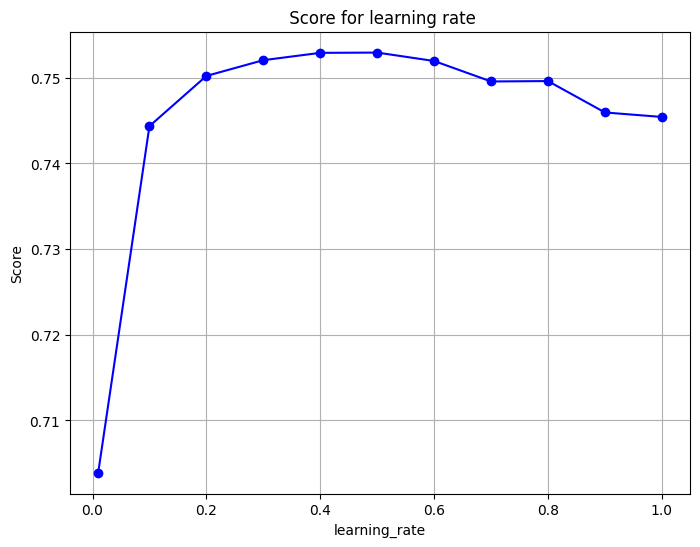

In [119]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['learning_rate']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for learning rate')
plt.xlabel('learning_rate')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [120]:
param_grid = {
    'subsample' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

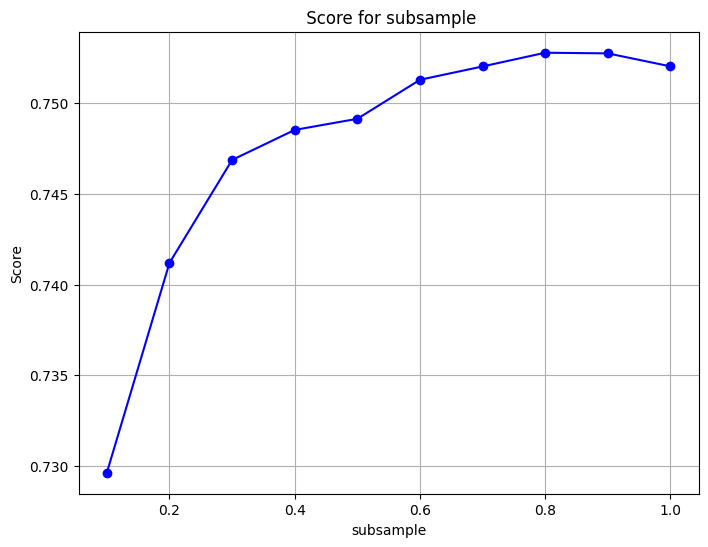

In [121]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['subsample']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for subsample')
plt.xlabel('subsample')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [122]:
param_grid = {
    'colsample_bytree' : [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

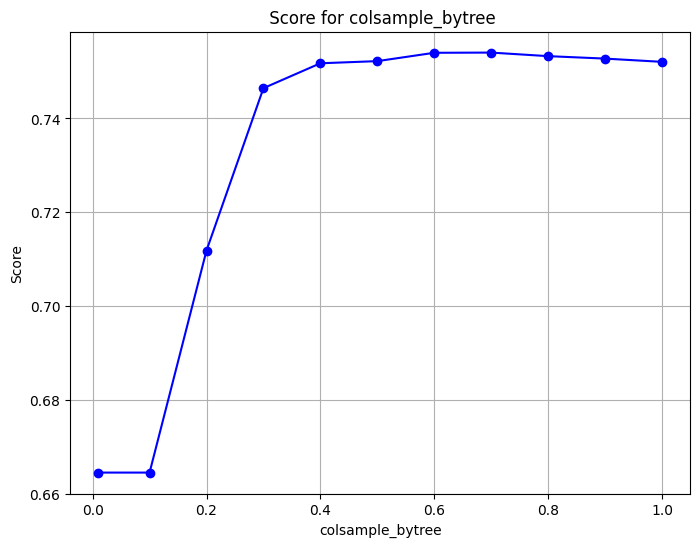

In [123]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['colsample_bytree']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for colsample_bytree')
plt.xlabel('colsample_bytree')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [124]:
param_grid = {
    'learning_rate' : [ 0.3, 0.4, 0.5, 0.6],
    'colsample_bytree' : [0.6, 0.7],
    'subsample' : [0.8, 0.9], 
    'n_estimators' : [450, 550, 600]
}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
print(best_params_xgb)

{'colsample_bytree': 0.6, 'learning_rate': 0.3, 'n_estimators': 450, 'subsample': 0.9}


In [125]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42,
                                  colsample_bytree=0.6, learning_rate=0.3, n_estimators=450, subsample=0.9)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
xgbreport = classification_report(y_test, y_pred)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.92      0.74      0.82     63419
           1       0.62      0.67      0.65     35365
           2       0.83      0.85      0.84     34705
           3       0.28      0.78      0.41      4922

    accuracy                           0.75    138411
   macro avg       0.66      0.76      0.68    138411
weighted avg       0.80      0.75      0.77    138411



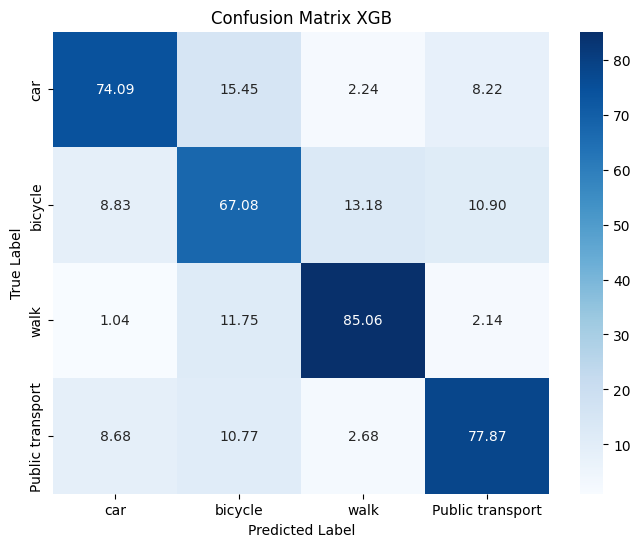

In [126]:
class_labels = ["car", "bicycle", "walk", "Public transport"]
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_xgb) / conf_matrix_xgb.sum(axis=1)
conf_matrix_percentages_xgb = (conf_matrix_xgb.T / conf_matrix_xgb.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_xgb, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix XGB')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

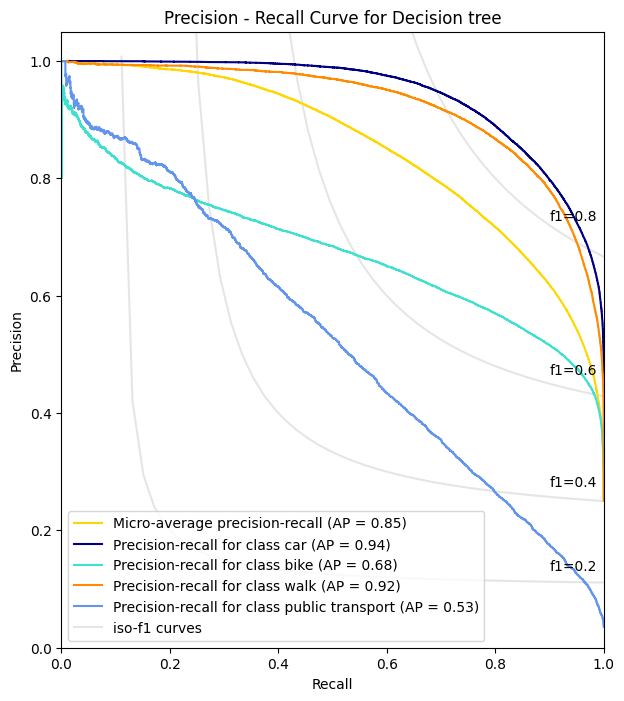

In [127]:
class_probabilities_xgb = xgb_classifier.predict_proba(X_test)
y_pred_prob_xgb = np.argmax(class_probabilities_xgb, axis=1)
y_test_bin_xgb = label_binarize(y_test, classes=xgb_classifier.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(xgb_classifier.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])
    average_precision[i] = average_precision_score(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_xgb.ravel(), class_probabilities_xgb.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_xgb, class_probabilities_xgb, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Decision tree")

plt.show()

# Experimenting with 3 class labels

We will now group bicycle and public transport into one class which is Sustainable Transportation.

In [103]:
df['Mode'] = df['Mode'].map({0:0, 1:2, 2:1, 3:2})

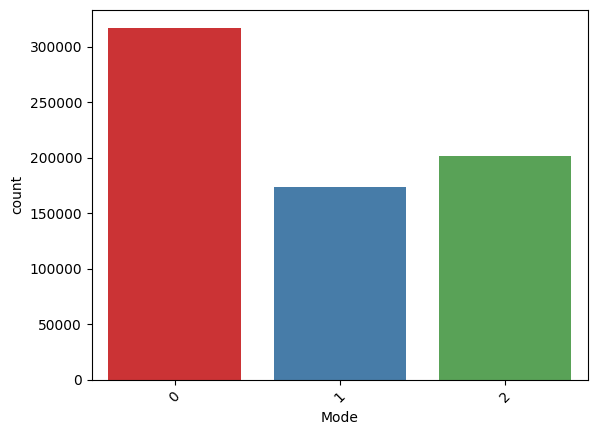

In [104]:
sns.countplot(x='Mode', data=df, palette='Set1')
plt.xticks(rotation=45)
plt.show()

In [105]:
drops = ["Mode", "Arrival_area", "Year"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [106]:
X, y = shuffle(X, y, random_state=42)
X

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,...,Departure_area_Genderland,Departure_area_North Brabant,Departure_area_North Holland,Departure_area_Other,Departure_area_South Holland,Departure_area_Utrecht,Household_composition_Couple,Household_composition_Couple and kids,Household_composition_One person household,Household_composition_Other
450271,2,0,59,1,1,0,1,5,3,0,...,0,0,0,0,1,0,1,0,0,0
28807,2,1,82,1,1,0,0,4,2,0,...,0,0,1,0,0,0,1,0,0,0
74133,3,1,55,1,3,1,0,6,4,0,...,0,0,1,0,0,0,0,1,0,0
343899,2,0,62,1,1,0,0,8,1,0,...,0,0,1,0,0,0,1,0,0,0
655809,5,1,51,1,2,0,0,5,6,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2,1,53,1,2,0,1,12,1,0,...,1,0,0,0,0,0,1,0,0,0
365838,2,1,42,1,0,0,0,9,4,0,...,0,0,1,0,0,0,1,0,0,0
131932,2,0,64,1,0,0,0,12,2,0,...,0,0,1,0,0,0,1,0,0,0
671155,4,1,40,1,1,0,0,12,1,0,...,0,0,0,1,0,0,0,1,0,0


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42, stratify=y)

In [108]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    253675
2    161147
1    138822
Name: count, dtype: int64

Class counts in y_test:
Mode
0    63419
2    40287
1    34705
Name: count, dtype: int64


In [110]:
undersampler = RandomUnderSampler(sampling_strategy={0: 161147}, random_state=1)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [111]:
y_train_series = pd.Series(y_train)
print(y_train_series.value_counts())

Mode
0    161147
2    161147
1    138822
Name: count, dtype: int64


# Logistic Regression

In [147]:
log_reg=LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'solver': ['lbfgs', 'liblinear'],
              'max_iter': [100, 200, 300]}
grid_search_log = GridSearchCV(log_reg, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_log.fit(X_train, y_train)
log_params = grid_search_log.best_params_
print(log_params)

{'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}


In [112]:
logreg_model=LogisticRegression(C=100, max_iter=200, solver='lbfgs')
logreg_model.fit(X_train, y_train)
y_pred_log = logreg_model.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81     63419
           1       0.76      0.89      0.82     34705
           2       0.61      0.67      0.64     40287

    accuracy                           0.76    138411
   macro avg       0.75      0.77      0.75    138411
weighted avg       0.77      0.76      0.76    138411



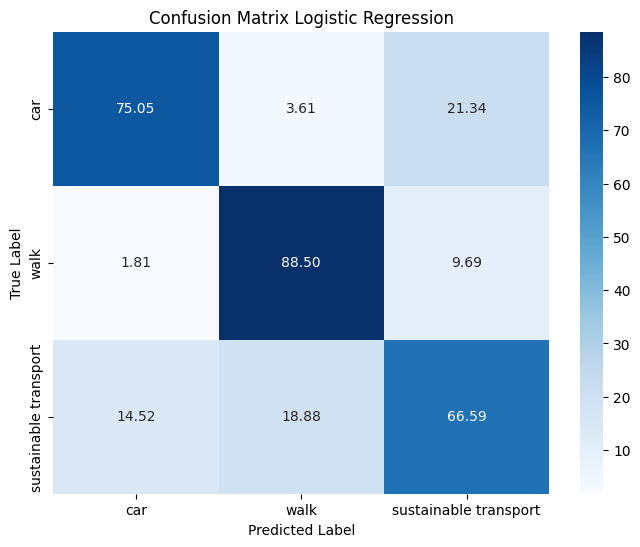

In [113]:
class_labels = ["car","walk", "sustainable transport"]
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_log) / conf_matrix_log.sum(axis=1)
conf_matrix_percentages_log = (conf_matrix_log.T / conf_matrix_log.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_log, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [114]:
class_labels_mapping = {
    0: 'car',
    1: 'walk',
    2: 'sustainable transport'
}

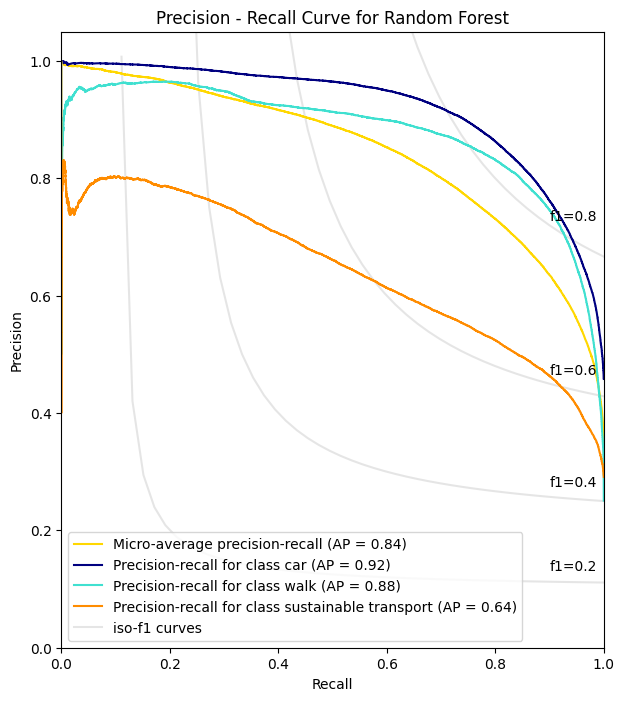

In [115]:
class_probabilities_log = logreg_model.predict_proba(X_test)
y_pred_prob_log = np.argmax(class_probabilities_log, axis=1)
y_test_bin_log = label_binarize(y_test, classes=logreg_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(logreg_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_log[:, i], class_probabilities_log[:, i])
    average_precision[i] = average_precision_score(y_test_bin_log[:, i], class_probabilities_log[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_log.ravel(), class_probabilities_log.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_log, class_probabilities_log, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Random Forest")

plt.show()

# Decision Tree

In [116]:
 tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)
y_pred_test = tree.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84     63419
           1       0.83      0.84      0.84     34705
           2       0.67      0.74      0.70     40287

    accuracy                           0.80    138411
   macro avg       0.79      0.80      0.79    138411
weighted avg       0.80      0.80      0.80    138411



In [153]:
dt_model = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': list(range(2, 45))
}

grid_search_dt = GridSearchCV(dt_model, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30, 31, ...]},
             scoring='f1_macro')

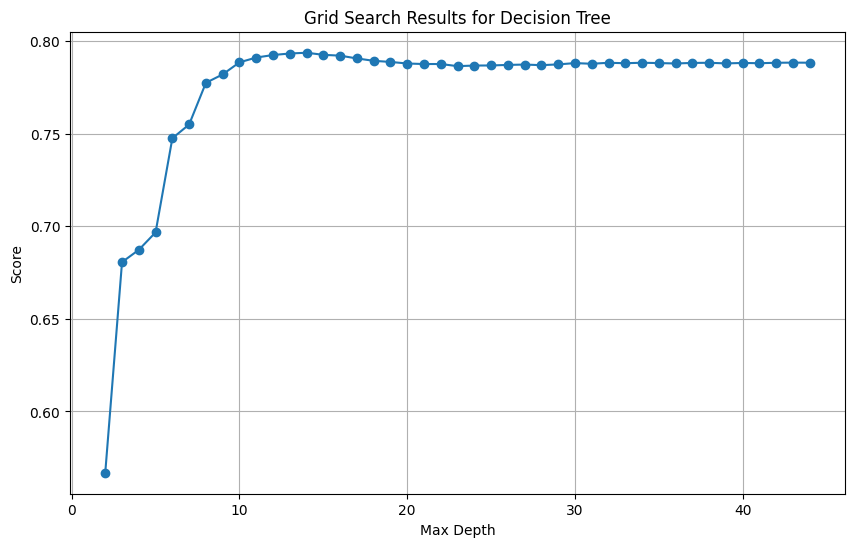

In [154]:
results = grid_search_dt.cv_results_
max_depth_values = results['param_max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [159]:
 tree = DecisionTreeClassifier(random_state = 42, max_depth=14)
tree.fit(X_train, y_train)
y_pred_test = tree.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83     63419
           1       0.83      0.84      0.84     34705
           2       0.62      0.77      0.69     40287

    accuracy                           0.79    138411
   macro avg       0.79      0.79      0.79    138411
weighted avg       0.81      0.79      0.79    138411



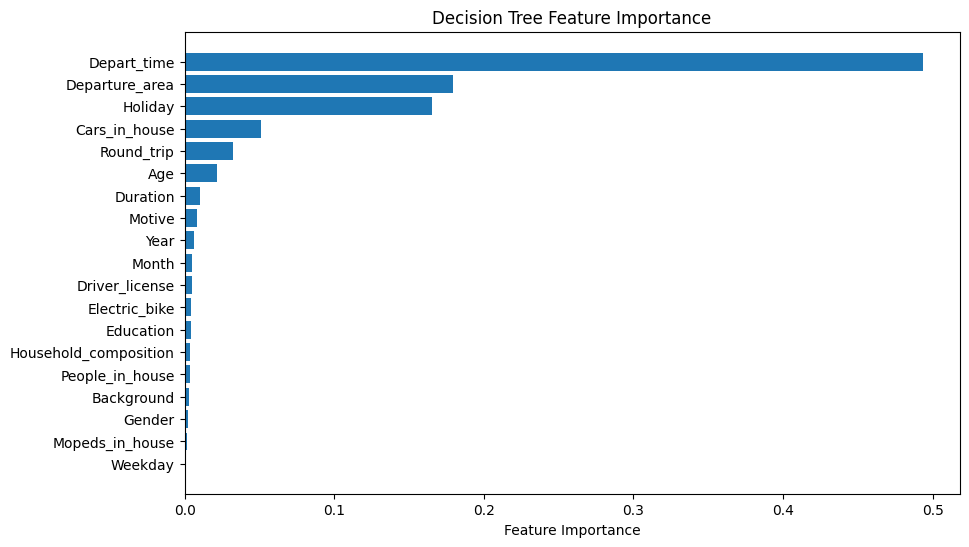

In [160]:
feature_importances = tree.feature_importances_

feature_names = ['People_in_house', 'Household_composition', 'Gender', 'Age',
       'Background', 'Education', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Year','Month', 'Weekday', "Holiday",
       'Round_trip', 'Motive', 'Departure_area', 'Duration', 'Depart_time',
       'Distance_in_kms']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

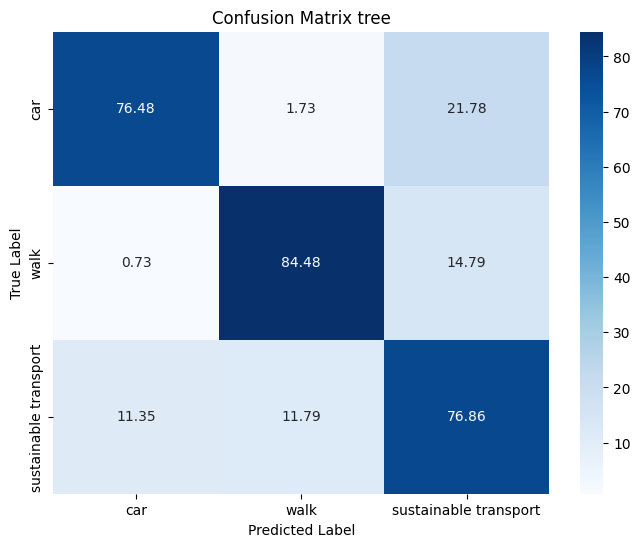

In [161]:
class_labels = ["car", "walk", "sustainable transport"]
conf_matrix_dt = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_dt) / conf_matrix_dt.sum(axis=1)
conf_matrix_percentages_dt = (conf_matrix_dt.T / conf_matrix_dt.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_dt, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

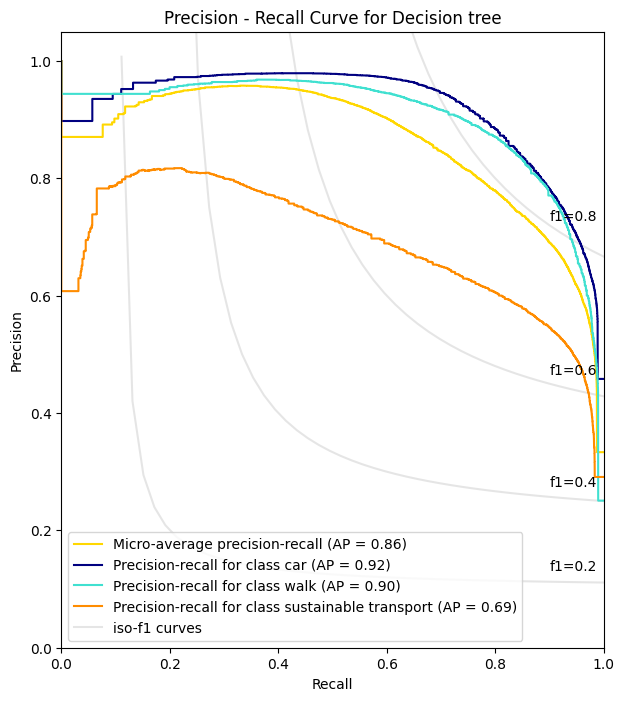

In [162]:
class_probabilities_tree = tree.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)
y_test_bin_tree = label_binarize(y_test, classes=tree.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(tree.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    average_precision[i] = average_precision_score(y_test_bin_tree[:, i], class_probabilities_tree[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_tree.ravel(), class_probabilities_tree.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_tree, class_probabilities_tree, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Decision tree")

plt.show()

# Random Forest

In [15]:
param_grid = {
    'max_features': range(2, 20)
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 3}


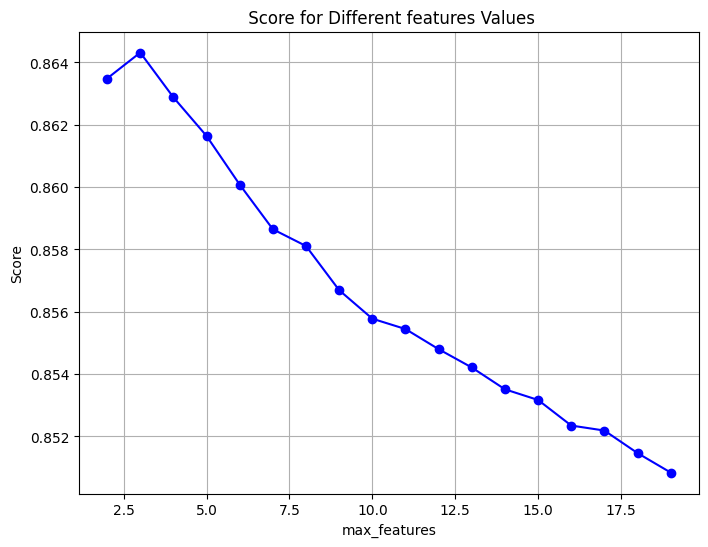

In [16]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['max_features']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for Different features Values')
plt.xlabel('max_features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [117]:
random_forest = RandomForestClassifier(random_state=42, max_features=5, n_estimators=400)
random_forest.fit(X_train, y_train)
y_pred_rf_basic = random_forest.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     63419
           1       0.88      0.91      0.90     34705
           2       0.76      0.85      0.80     40287

    accuracy                           0.87    138411
   macro avg       0.86      0.87      0.87    138411
weighted avg       0.87      0.87      0.87    138411



IndexError: list index out of range

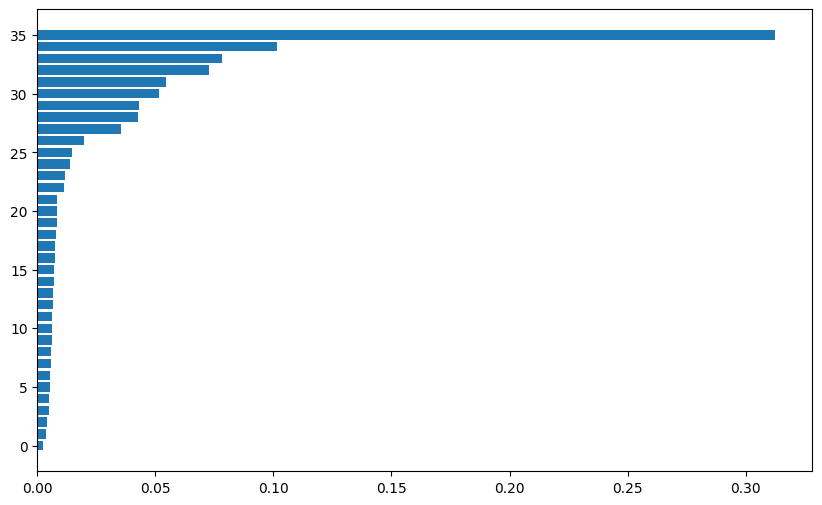

In [118]:
feature_importances = random_forest.feature_importances_

feature_names = ['People_in_house', 'Household_composition', 'Gender', 'Age',
       'Background', 'Education', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday','Holiday',
       'Round_trip', 'Motive', 'Departure_area', 'Duration', 'Depart_time',
       'Distance_in_kms']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

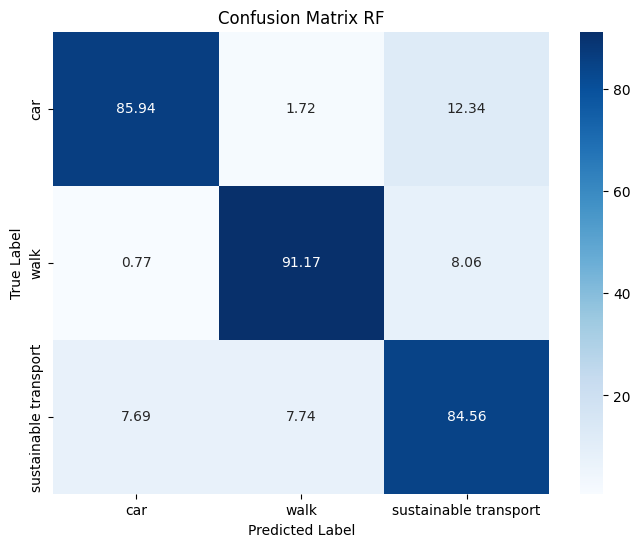

In [119]:
class_labels = ["car","walk", "sustainable transport"]
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_basic)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_rf) / conf_matrix_rf.sum(axis=1)
conf_matrix_percentages_rf = (conf_matrix_rf.T / conf_matrix_rf.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_rf, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix RF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [120]:
class_labels_mapping = {
    0: 'car',
    1: 'walk',
    2: 'sustainable transport'
}

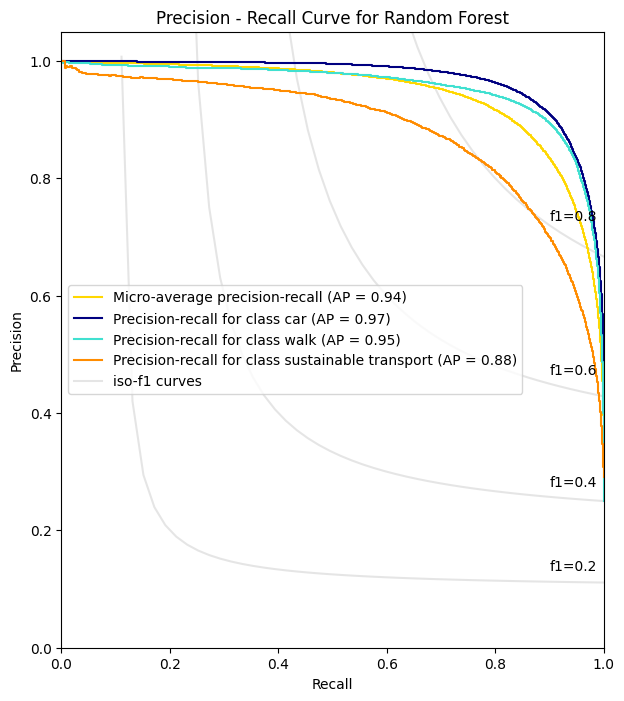

In [121]:
class_probabilities_rf = random_forest.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)
y_test_bin_rf = label_binarize(y_test, classes=random_forest.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(random_forest.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    average_precision[i] = average_precision_score(y_test_bin_rf[:, i], class_probabilities_rf[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_rf.ravel(), class_probabilities_rf.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_rf, class_probabilities_rf, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Random Forest")

plt.show()

# XGBoost

In [168]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42,
                                  colsample_bytree=0.6, learning_rate=0.3, n_estimators=450, subsample=0.9)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
xgbreport = classification_report(y_test, y_pred)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     63419
           1       0.84      0.87      0.86     34705
           2       0.68      0.78      0.73     40287

    accuracy                           0.82    138411
   macro avg       0.81      0.82      0.81    138411
weighted avg       0.83      0.82      0.82    138411



In [24]:
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Weekday,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Duration,Mode,Depart_time,Distance_in_kms
0,1,4,1,42,0,4,1,1,0,0,...,6,0,0,5,4,4,15,0,10.30,6.0
1,1,4,1,42,0,4,1,1,0,0,...,6,0,0,5,4,4,10,0,11.15,6.0
2,1,4,1,42,0,4,1,1,0,0,...,6,0,0,8,4,4,5,2,15.55,1.0
3,1,4,1,42,0,4,1,1,0,0,...,6,0,0,8,4,4,5,2,18.30,1.0
4,2,0,1,42,0,4,1,1,0,0,...,5,0,0,5,4,4,10,0,9.00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692050,3,6,0,49,1,6,1,1,0,0,...,4,0,0,1,7,7,35,0,15.56,11.0
692051,3,6,0,49,1,6,1,1,0,0,...,4,0,0,5,7,7,7,1,16.50,1.1
692052,3,6,0,49,1,6,1,1,0,0,...,4,0,0,5,7,7,5,1,17.15,0.6
692053,3,6,0,49,1,6,1,1,0,0,...,4,0,0,6,7,7,15,0,18.20,6.3


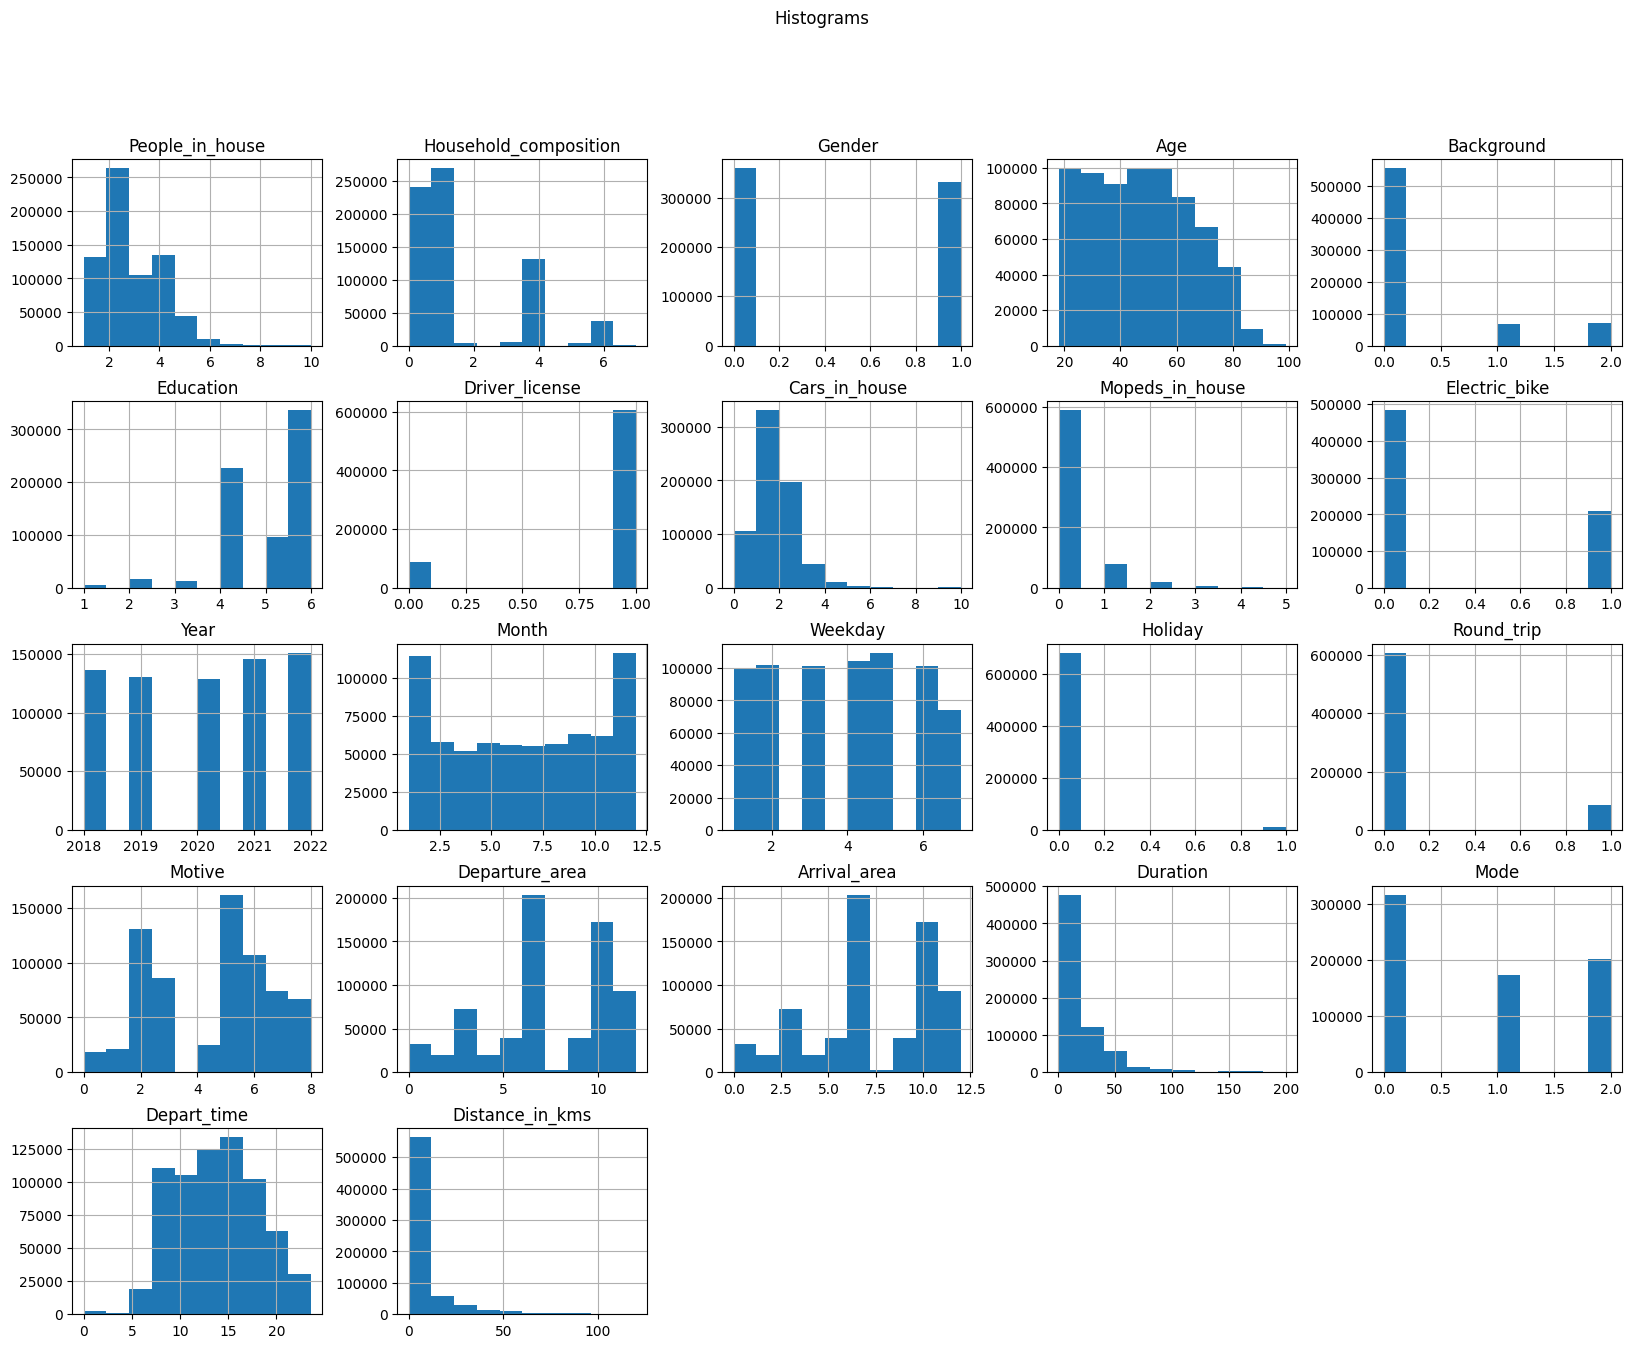

In [39]:
df.hist(bins=10, figsize=(20, 15))
plt.suptitle('Histograms') 
plt.show()

In [40]:
df = df[(df['Duration'] <= 60)]

In [41]:
df = df[(df['Distance_in_kms'] <= 45)]

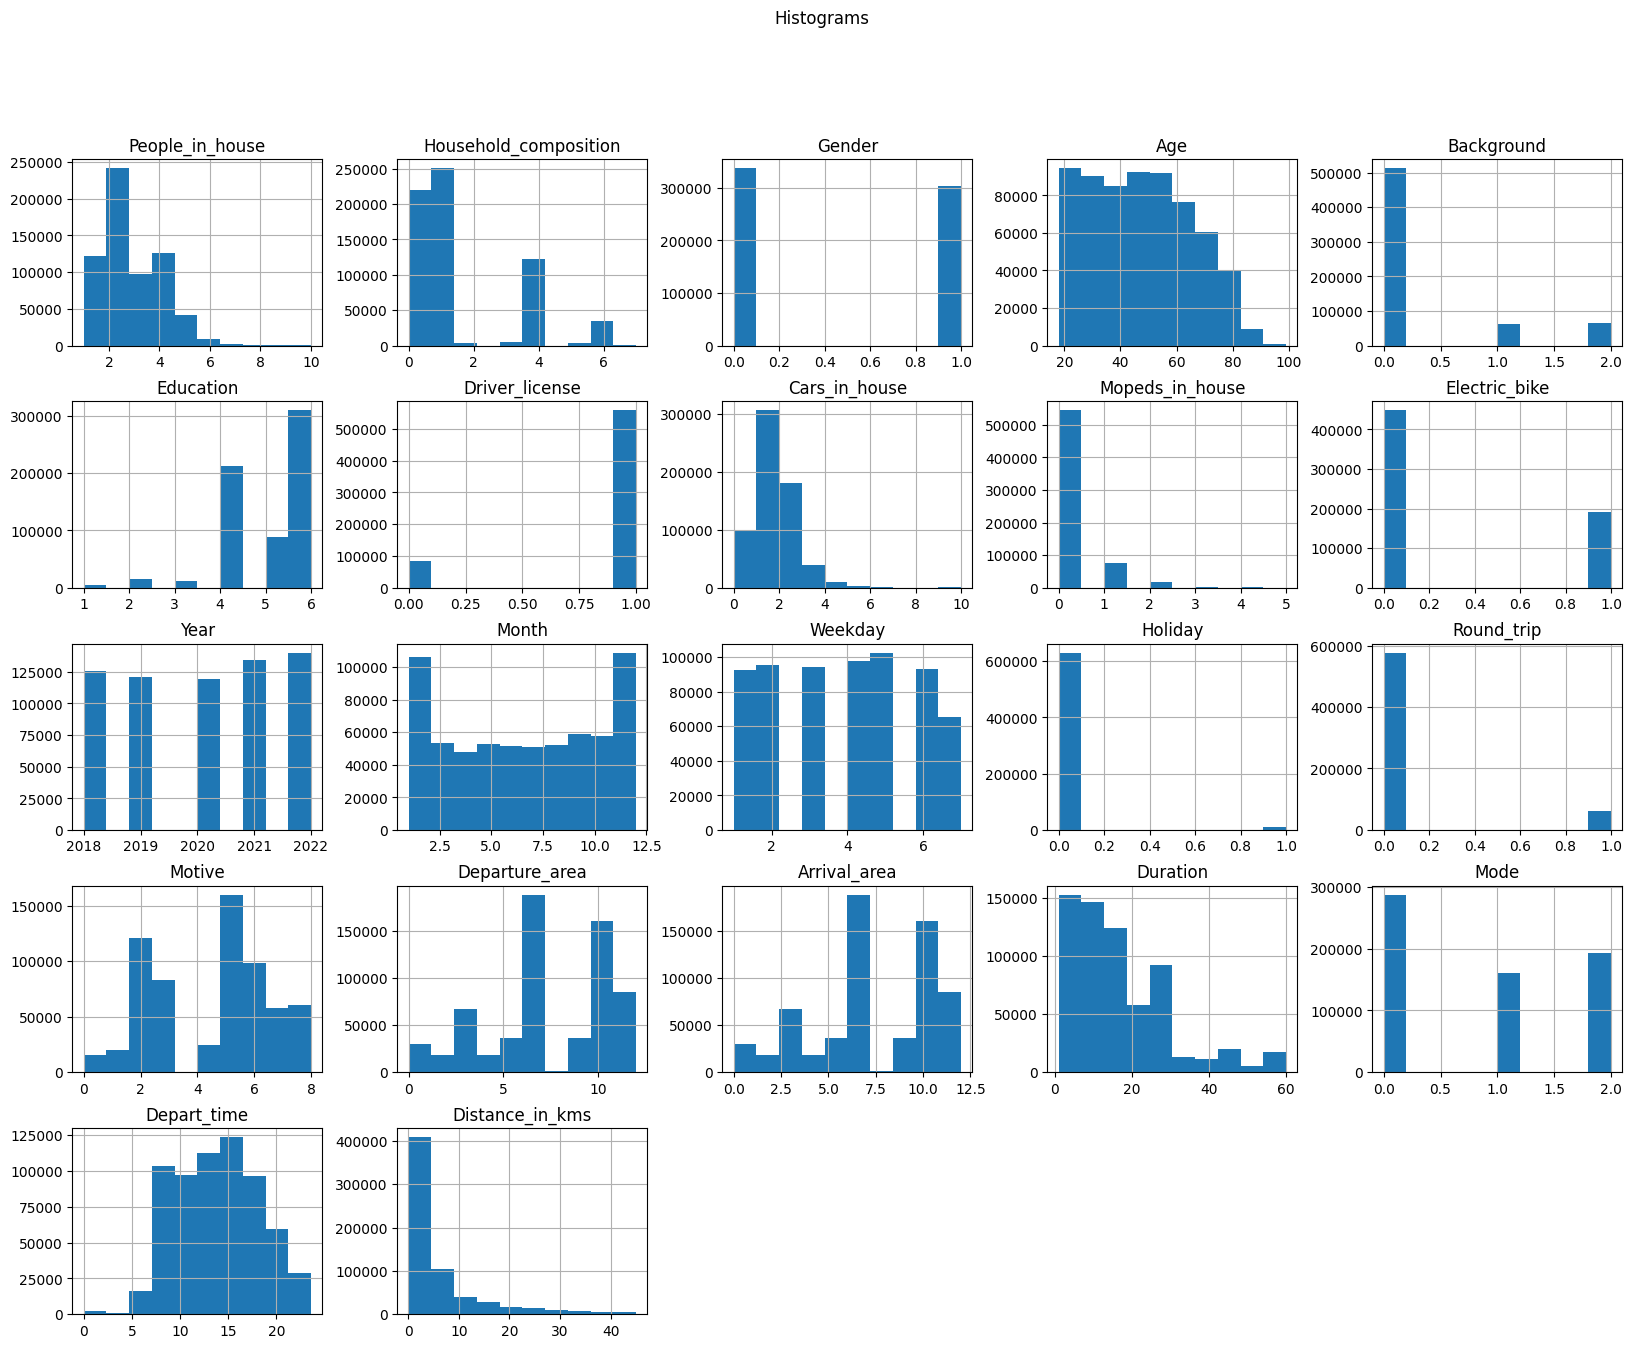

In [42]:
df.hist(bins=10, figsize=(20, 15))
plt.suptitle('Histograms') 
plt.show()

In [43]:
df.shape

(640416, 22)

In [44]:
drops = ["Mode", "Arrival_area", "Year"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [45]:
X, y = shuffle(X, y, random_state=42)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42, stratify=y)

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    230061
2    154141
1    128130
Name: count, dtype: int64

Class counts in y_test:
Mode
0    57516
2    38536
1    32032
Name: count, dtype: int64


In [49]:
undersampler = RandomUnderSampler(sampling_strategy={0: 154141}, random_state=1)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

# Decision Tree

In [52]:
 tree = DecisionTreeClassifier(random_state = 42, max_depth=16)
tree.fit(X_train, y_train)
y_pred_test = tree.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82     57516
           1       0.83      0.83      0.83     32032
           2       0.62      0.76      0.68     38536

    accuracy                           0.78    128084
   macro avg       0.78      0.78      0.78    128084
weighted avg       0.80      0.78      0.78    128084



# Random Forest

In [53]:
random_forest = RandomForestClassifier(random_state=42, max_features=3, n_estimators=400)
random_forest.fit(X_train, y_train)
y_pred_rf_basic = random_forest.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89     57516
           1       0.88      0.91      0.90     32032
           2       0.77      0.85      0.81     38536

    accuracy                           0.87    128084
   macro avg       0.86      0.87      0.87    128084
weighted avg       0.87      0.87      0.87    128084

